In [8]:
import os
import json
import matplotlib.pyplot as plt

In [9]:
all_results = []

for file in os.listdir("evaluation_results"):
    if file.endswith(".json"):
        with open(f"evaluation_results/{file}", "r") as f:
            data = json.load(f)
            all_results.extend(data)

In [11]:
# Initialize counters for overall accuracy and per class accuracy
total_correct = 0
total_guesses = 0
generated_correct = 0
generated_total = 0
authentic_correct = 0
authentic_total = 0

# Process the loaded results
for result in all_results:
    # print(result['correct'])
    # Update overall accuracy
    total_correct += 1 if result['correct'] else 0
    total_guesses += 1  # Each entry counts as a guess

    # Update class-specific accuracy
    if result['actual'] == 'generated':
        generated_total += 1
        if result['correct']:
            generated_correct += 1
    elif result['actual'] == 'authentic':
        authentic_total += 1
        if result['correct']:
            authentic_correct += 1

# Calculate accuracies
overall_accuracy = (total_correct / total_guesses) * 100
generated_accuracy = (generated_correct / generated_total) * 100 if generated_total > 0 else 0
authentic_accuracy = (authentic_correct / authentic_total) * 100 if authentic_total > 0 else 0

print(f"Overall detection accuracy: {overall_accuracy:.2f}%")
print(f"Generated detection accuracy: {generated_accuracy:.2f}%")
print(f"Authentic detection accuracy: {authentic_accuracy:.2f}%")


Overall detection accuracy: 50.00%
Generated detection accuracy: 66.67%
Authentic detection accuracy: 33.33%


In [13]:
indiv = {}
for result in all_results:
    if result['correct']:
        indiv[result['evaluator']] = indiv.get(result['evaluator'], 0) + 1

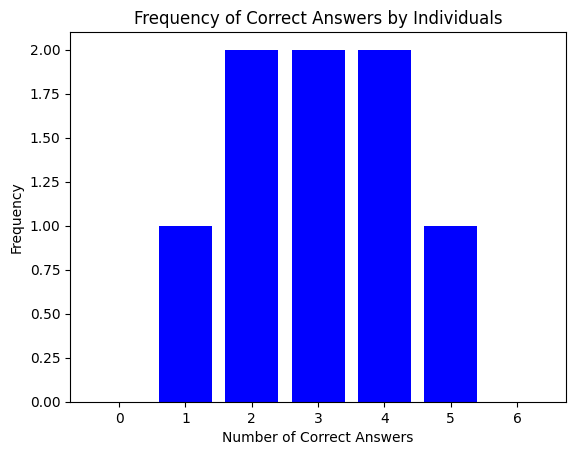

In [17]:
frequency = {}

# Count the frequency of each number of correct answers
for correct_answers in indiv.values():
    if correct_answers in frequency:
        frequency[correct_answers] += 1
    else:
        frequency[correct_answers] = 1

# Data for plotting
labels = [0] + list(frequency.keys()) + [6]
counts = [0] + list(frequency.values()) + [0]  # Add a 0 for the case where no one got all correct

# Create bar graph
plt.bar(labels, counts, color='blue')
plt.xlabel('Number of Correct Answers')
plt.ylabel('Frequency')
plt.title('Frequency of Correct Answers by Individuals')
# plt.yticks(range(0, max(counts) + 1))
plt.savefig('correct_answers.png')
# plt.show()